# Scene Images

Once again, here is our story so far since generating characters.

In [ ]:
%pip install --upgrade torchvision>=0.15.2 diffusers transformers

In [1]:
import settings
from model import Story, Character, Scene

# The last time json data was saved was step 4
story = Story.load_from_directory(settings.STORY_DIR + "/step_4")

# Image Generation
Generate images from text

In [1]:
# Load the model
from model_image import generate_image

RuntimeError: Failed to import diffusers.pipelines.flux.pipeline_flux because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.single_file because of the following error (look up to see its traceback):
Failed to import transformers.models.auto.image_processing_auto because of the following error (look up to see its traceback):
operator torchvision::nms does not exist

## Scene Image Generation

In [ ]:
# Function to generate images for characters

from typing import List
from IPython.display import Markdown, display

def generate_scene_image_prompt(story: Story, scene: Scene):
    prompt = (
        f"Create a {story.visual_style} wide shot of a background scene for use in a {story.medium}. \n\n"
        f"Layer 1 (Background): {scene.background_image_prompt} \n\n"
        # f"Use lighting that hints at a cosmic or supernatural glow, giving the background a sense of energy.\n\n"
        # f"Layer 2 (Foreground):  including hands, feet, arms, legs and face of {character.image_prompt}. \n\n"
        # f"Layer 2 (Foreground):  Full body character: {character.image_prompt}. \n\n"
        # f"{story.visual_style} style for a {story.medium}\n\n"
        # f"Focus on {character.physical_appearance}, emphasizing {character.personality}. "
    )
    return prompt

def generate_scene_images(story: Story, scenes: List[Scene]=None, background=False, debug_display=False):
    if not scenes:
        scenes = [scene for act in story.acts for scene in act.scenes]

    # TODO: Possibly batch these later, but for now we are crashing the Jupyter kernel for some reason
    
    images = {}

    for scene in scenes:
        if background:
            prompt = generate_scene_image_prompt(story, scene)
            # image = generate_image(prompt, height=392, width=512)
            # image = generate_image(prompt, height=704, width=1280)

        else:
            prompt = scene.scene_image_prompt
            # prompt = generate_scene_image_prompt_live(story, scene)
            # p2 = scene.scene_image_prompt
            # p1 = scene.scene_image_prompt_short if scene.scene_image_prompt_short else p2

        image = generate_image(prompt, height=settings.CHARACTER_ANIMATION_HEIGHT, width=settings.CHARACTER_ANIMATION_WIDTH)
        # image = generate_image(prompt)
        images[scene.scene_id] = image
    
        if debug_display:
            display(Markdown(f"---\n### Generated Image for scene: {scene.title}"))
            display(Markdown(f"\nPrompt: \n```\n{prompt}\n```"))
            # TODO: Resize to small size for display to lower notebook size
            display(image)

    return images


def generate_scene_image(story: Story, scene: Scene, debug_display=False):
    return generate_scene_images(story, [scene], debug_display)[0]


## Example

In [ ]:
# Example
import settings
if settings.EXECUTE_EXAMPLES:
    from IPython.display import Markdown, display

    example_story = Story(
        prompt="A young hero must embark on a dangerous journey to retrieve a magical artifact hidden deep within an enchanted forest. Along the way, they encounter mythical creatures, wise mentors, and cunning adversaries.",
        title="The Enchanted Quest",
        genre="Fantasy",
        medium="Book",
        visual_style="Epic Fantasy",
        characters=[
            Character(name="Elara", role="Young Hero", description="A brave and determined young hero with a strong sense of justice.", personality="Courageous, resourceful, and kind-hearted.", physical_appearance="Slim build, with long dark hair and piercing green eyes."),
            Character(name="Thalion", role="Wise Mentor", description="An experienced and wise mentor who guides the hero through their journey.", personality="Patient, knowledgeable, and protective.", physical_appearance="Tall and imposing, with silver hair and a long flowing robe."),
        ],
        plot_overview="In a mystical kingdom threatened by chaos, a warrior from the future appears to prevent a disaster caused by a time-traveling villain. The kingdom's fate rests on ancient relics that control time, and the warrior must find them before the villain gains control. Along the way, the warrior forms an unlikely alliance with a local mage, a renegade knight, and a young thief. Together, they navigate betrayal, ancient curses, and forbidden knowledge. As the final battle approaches, the warrior must confront not only the villain but also the dark truth about their own origin.",
    )

    display(Markdown("### Generated Scene Images:\n\n"))

    # generate_scene_images(example_story, debug_display=True)
    generate_scene_images(example_story, debug_display=False) # Debug deisplay bloats the size of the notebook

# Generate Scene Action Images

In [ ]:
# Ensure the directory exists
import os

output_dir = settings.STORY_DIR + "/step_6/scenes/"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# This will update the state of the story object with the images for each character
# scene_images = generate_scene_images(story, background=False, debug_display=True)
scene_images = generate_scene_images(story, background=False, debug_display=False) # Debug deisplay bloats the size of the notebook

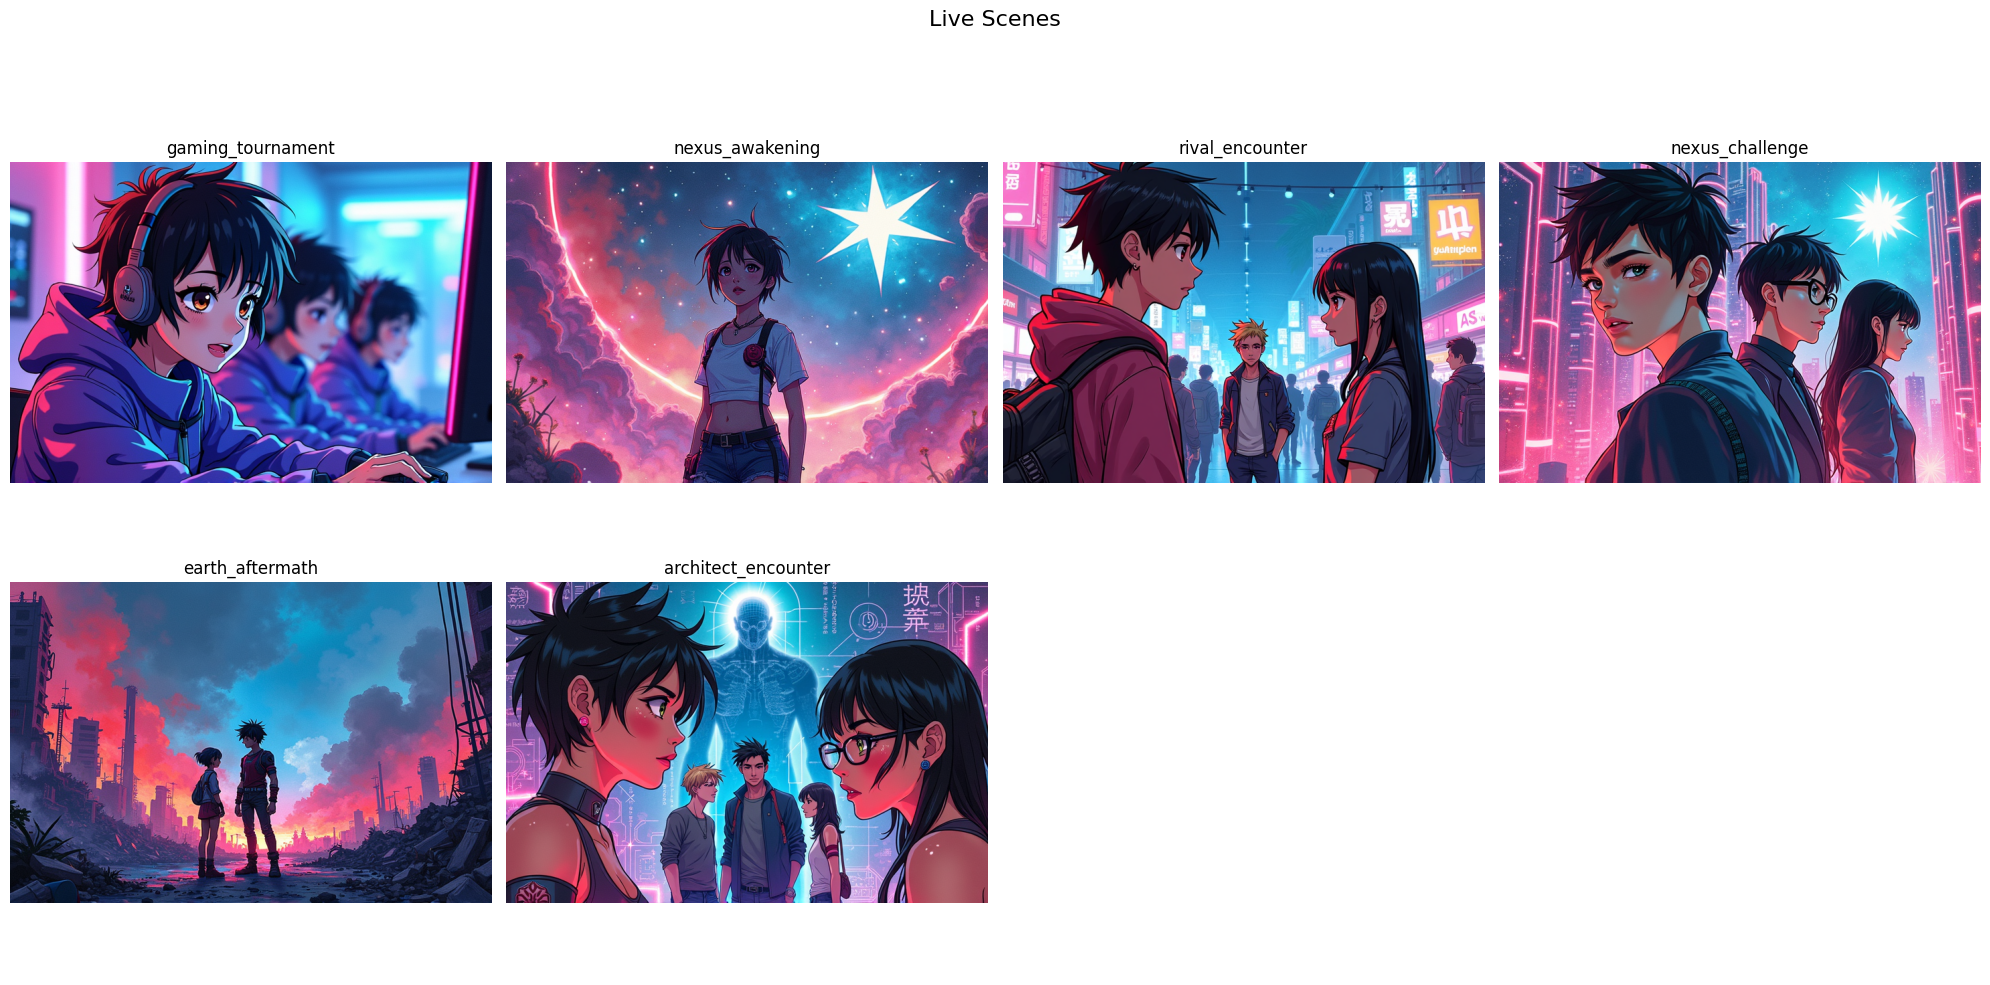

In [6]:
from model_image import show_image_grid
show_image_grid(scene_images, main_title="Live Scenes")

# Generate Scene Background Images

In [7]:
# Make some background images
# scene_images_background = generate_scene_images(story, background=True, debug_display=True)
scene_images_background = generate_scene_images(story, background=True, debug_display=False) # debug_display will bloat the size of the notebook

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['packed audience']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sky']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['underway']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

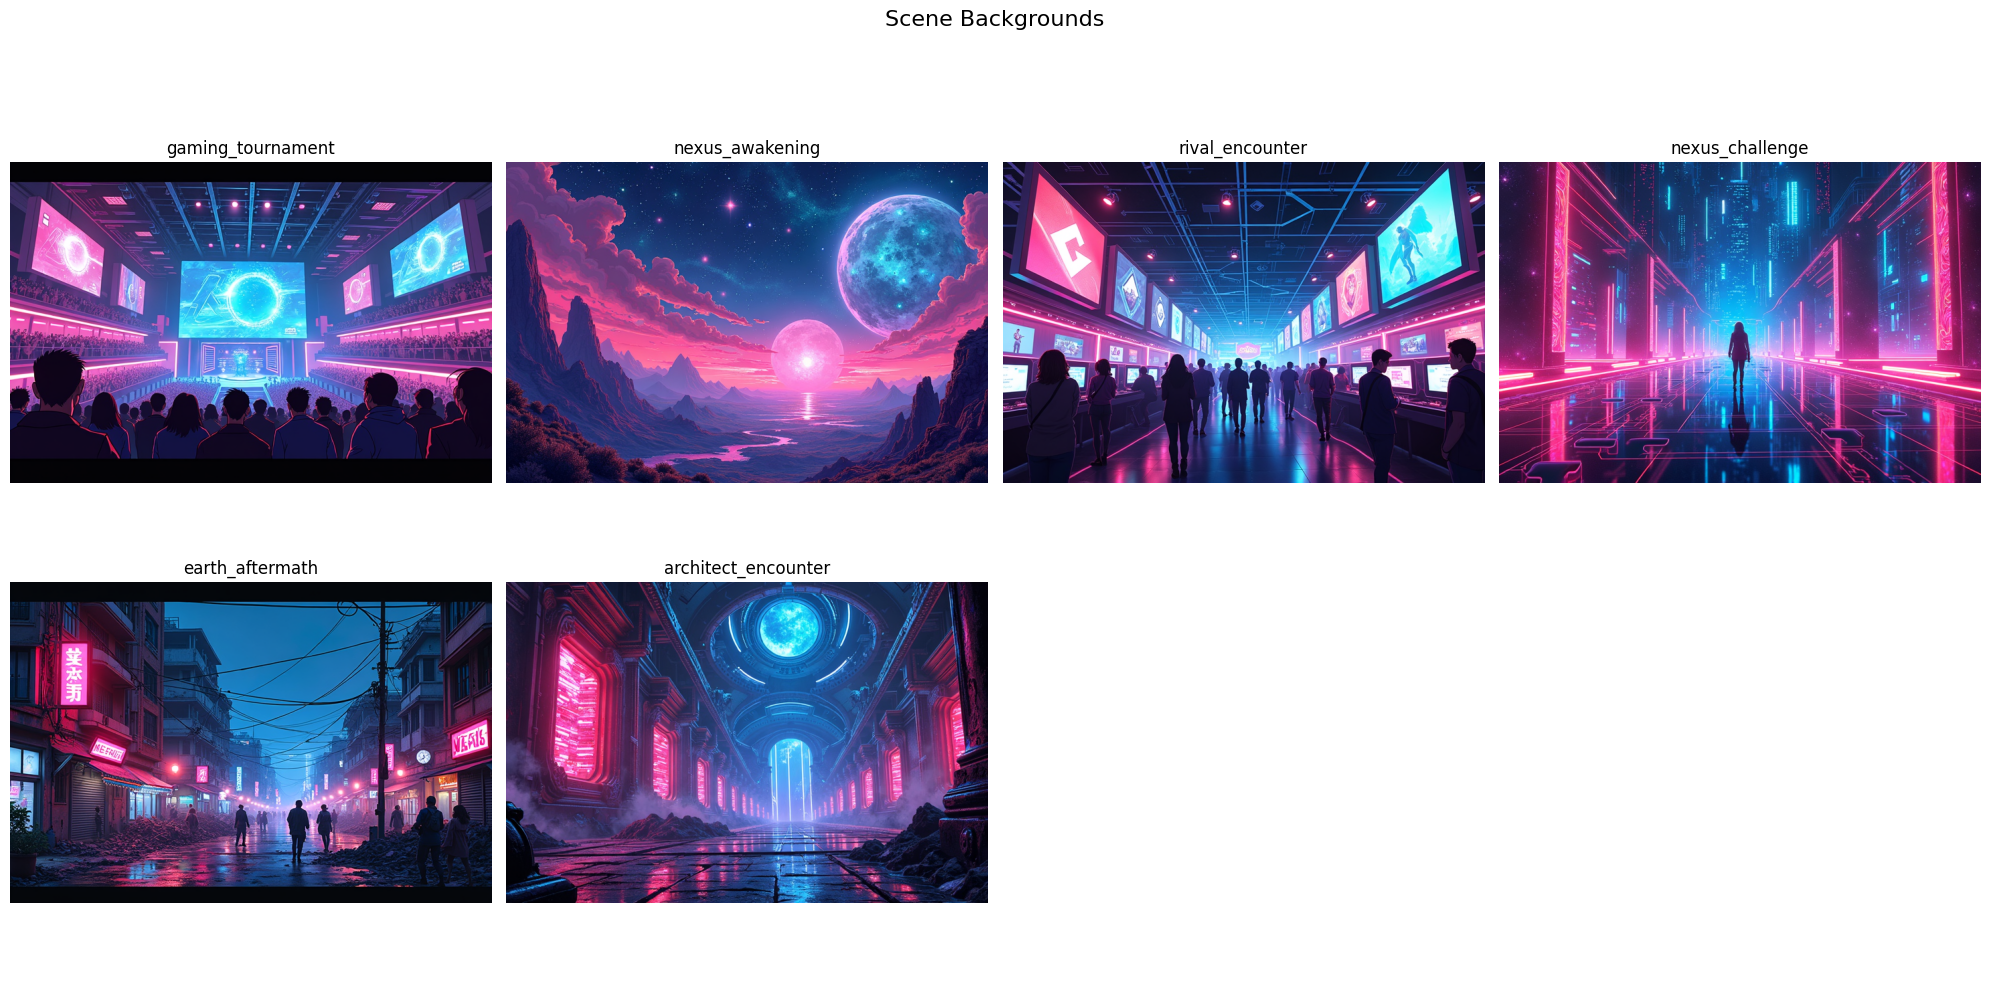

In [8]:
# from model_image import show_image_grid
show_image_grid(scene_images_background, main_title="Scene Backgrounds")

# Create Title Image

In [3]:
# Function to generate image for title screen
from IPython.display import Markdown, display

def generate_title_image_prompt(story: Story):
    prompt = (
        f"An ultrawide shot in style {story.visual_style} of a {story.medium} title screen. "
        f"Time period is {story.time_period} \n\n"
        f"Location: {story.location} \n\n"
        f"The title phrase '{story.title}' is displayed prominently front and center."
    )
    return prompt

def generate_title_image(story: Story, debug_display=False):
    prompt = generate_title_image_prompt(story)
    image = generate_image(prompt, height=settings.CHARACTER_ANIMATION_HEIGHT, width=settings.CHARACTER_ANIMATION_WIDTH)

    if debug_display:
        display(Markdown(f"---\n### Generated Image for scene: {scene.title}"))
        display(Markdown(f"\nPrompt: \n```\n{prompt}\n```"))
        # TODO: Resize to small size for display to lower notebook size
        display(image)

    return image

In [5]:
generate_title_image(story, debug_display=True)

NameError: name 'generate_image' is not defined

# Save the Images
Let's keep our progress so far.

In [ ]:
# Ensure the directory exists
import os

output_dir = settings.STORY_DIR + "/step_6/scenes/"
os.makedirs(output_dir, exist_ok=True)

for name, image in scene_images.items():
    image.save(output_dir + name + ".live.png")

for name, image in scene_images_background.items():
    image.save(output_dir + name + ".png")

!ls -lah {output_dir}*.png

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


-rw-rw-r-- 1 matt matt 613K Nov 10 21:22 stories/my_story/step_6/scenes/architect_encounter.live.png
-rw-rw-r-- 1 matt matt 620K Nov 10 21:22 stories/my_story/step_6/scenes/architect_encounter.png
-rw-rw-r-- 1 matt matt 567K Nov 10 21:22 stories/my_story/step_6/scenes/earth_aftermath.live.png
-rw-rw-r-- 1 matt matt 565K Nov 10 21:22 stories/my_story/step_6/scenes/earth_aftermath.png
-rw-rw-r-- 1 matt matt 539K Nov 10 21:22 stories/my_story/step_6/scenes/gaming_tournament.live.png
-rw-rw-r-- 1 matt matt 509K Nov 10 21:22 stories/my_story/step_6/scenes/gaming_tournament.png
-rw-rw-r-- 1 matt matt 603K Nov 10 21:22 stories/my_story/step_6/scenes/nexus_awakening.live.png
-rw-rw-r-- 1 matt matt 567K Nov 10 21:22 stories/my_story/step_6/scenes/nexus_awakening.png
-rw-rw-r-- 1 matt matt 606K Nov 10 21:22 stories/my_story/step_6/scenes/nexus_challenge.live.png
-rw-rw-r-- 1 matt matt 589K Nov 10 21:22 stories/my_story/step_6/scenes/nexus_challenge.png
-rw-rw-r-- 1 matt matt 545K Nov 10 21:22 st

# Next Step
Onto [Step 7: Character Animations](./7_character_animated.ipynb)